# Decision Tree Regression

In [34]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [35]:
df = pd.read_csv('data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data Prep

In [61]:
# Convert binary var to 1 and 0.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [62]:
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [63]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,0.909091,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,0.909091,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,0.906061,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,0.836364,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [64]:
# Create dummy var for other categorical var. (furnishingstatus)
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [66]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [67]:
#concat with original df and drop old furnishingstatus var.
df = df.drop('furnishingstatus', axis=1)
df = pd.concat([df, status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,0.909091,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,0.909091,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,0.906061,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,0.836364,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Split Data

In [69]:
# Split the data into x and y variables.
X = df.drop('price', axis=1)
y = df['price']

In [70]:
#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)

(381, 13)
(164, 13)


## Model Building

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

In [73]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

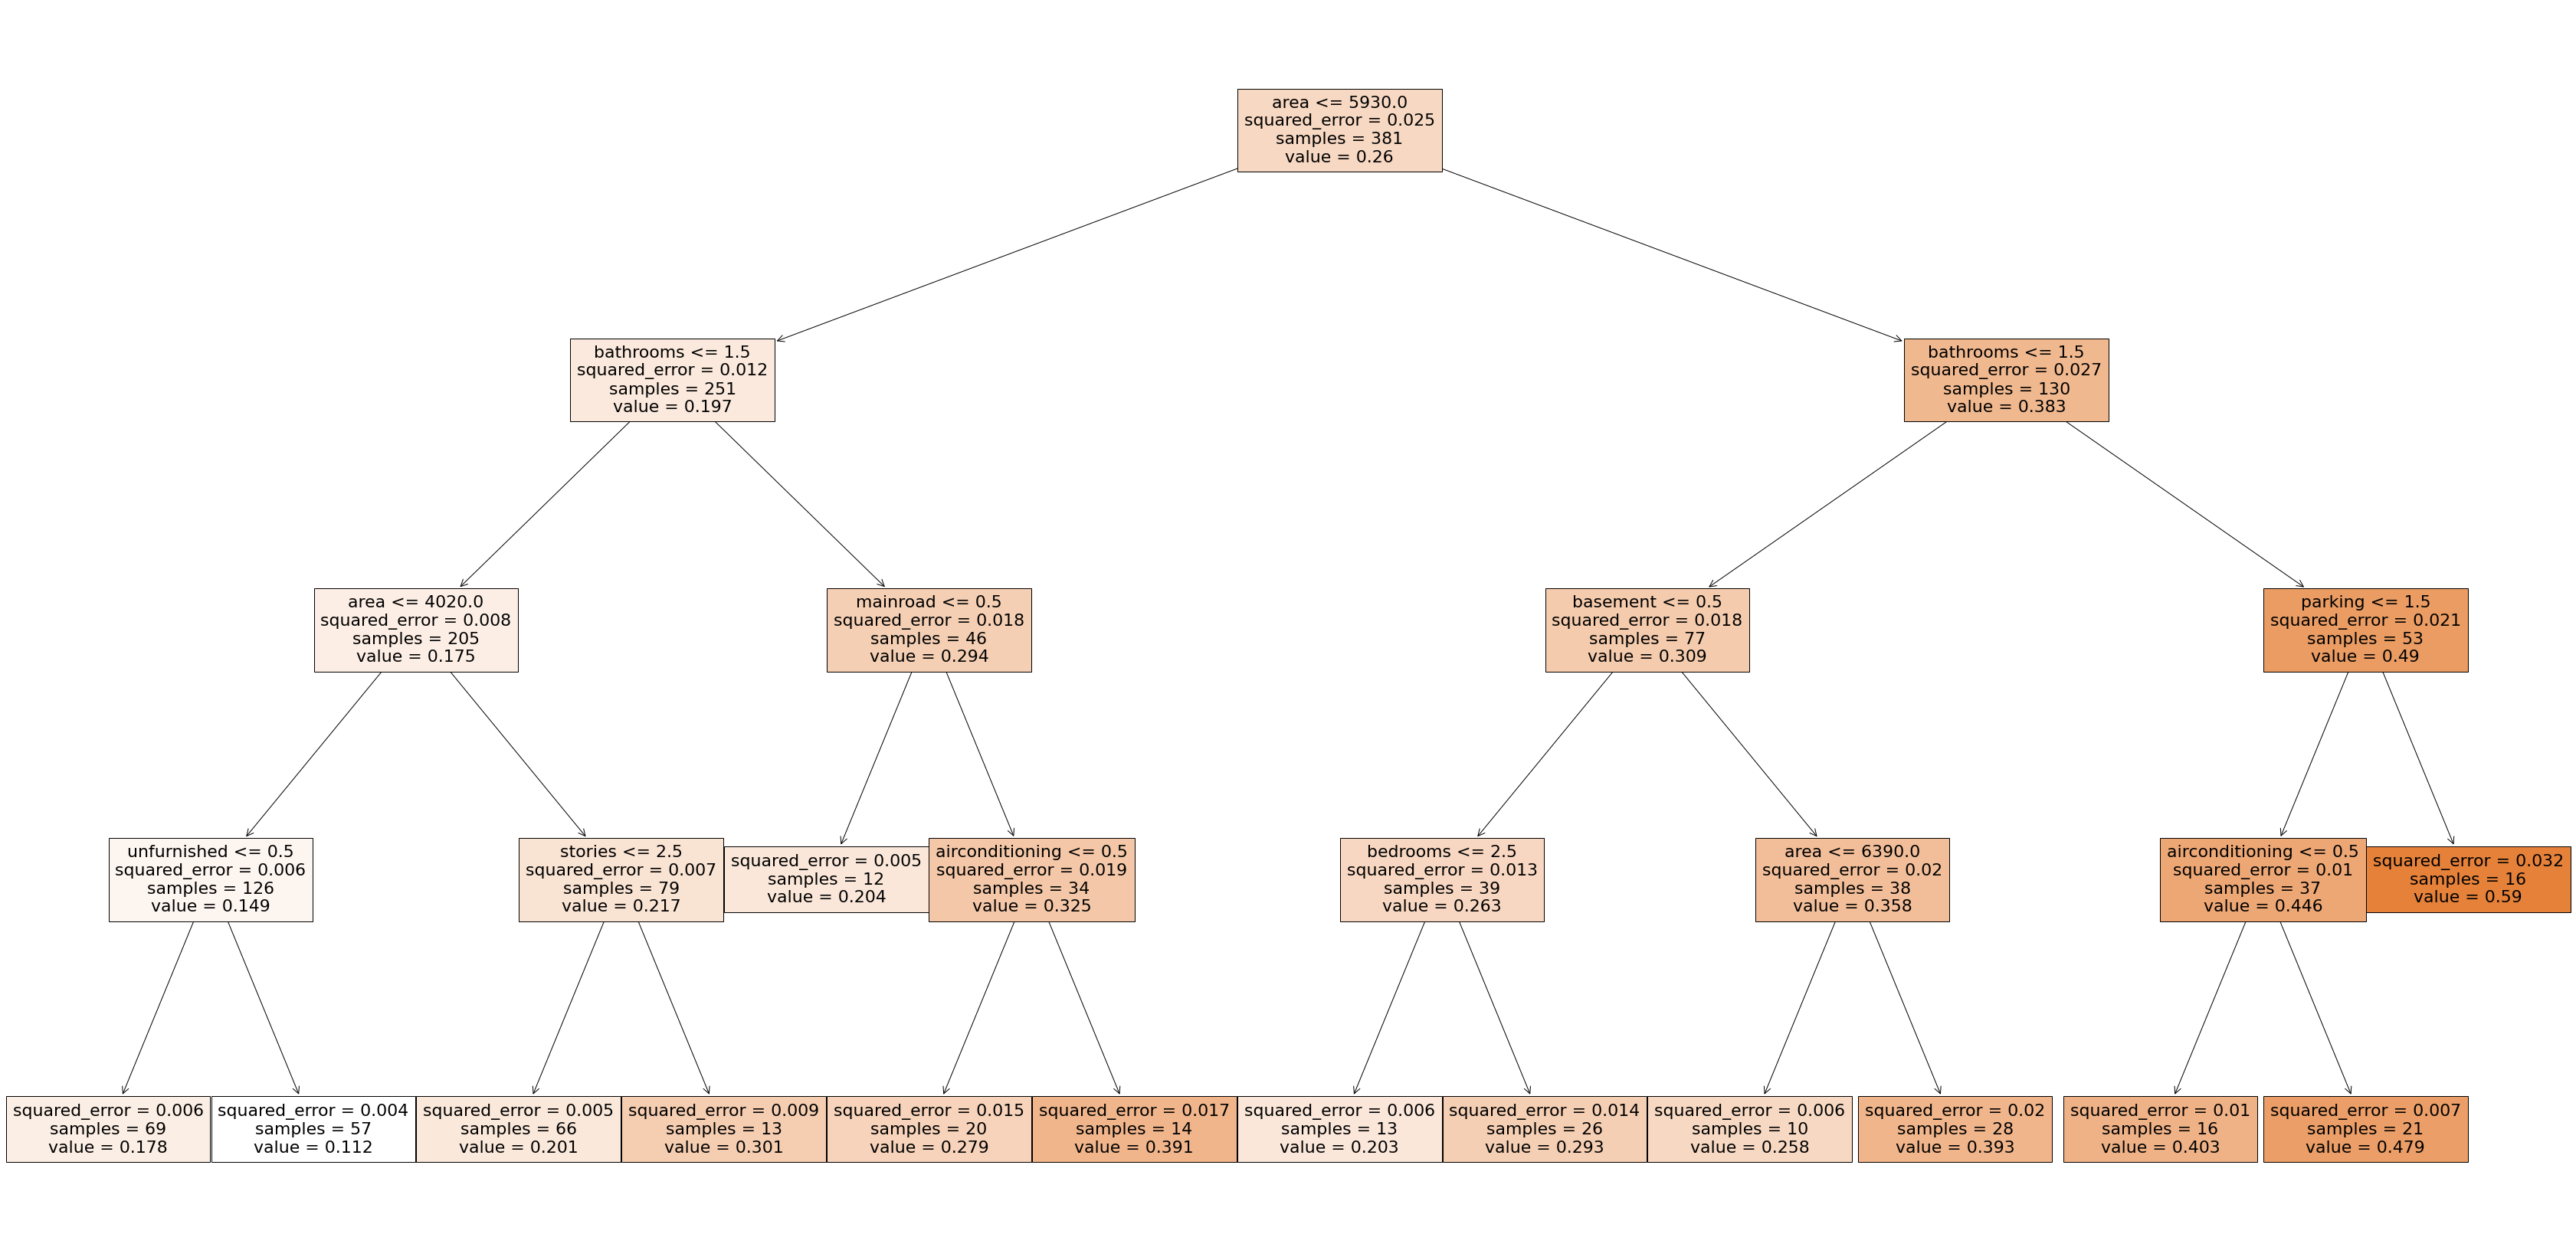

In [74]:
# Plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,filled=True);

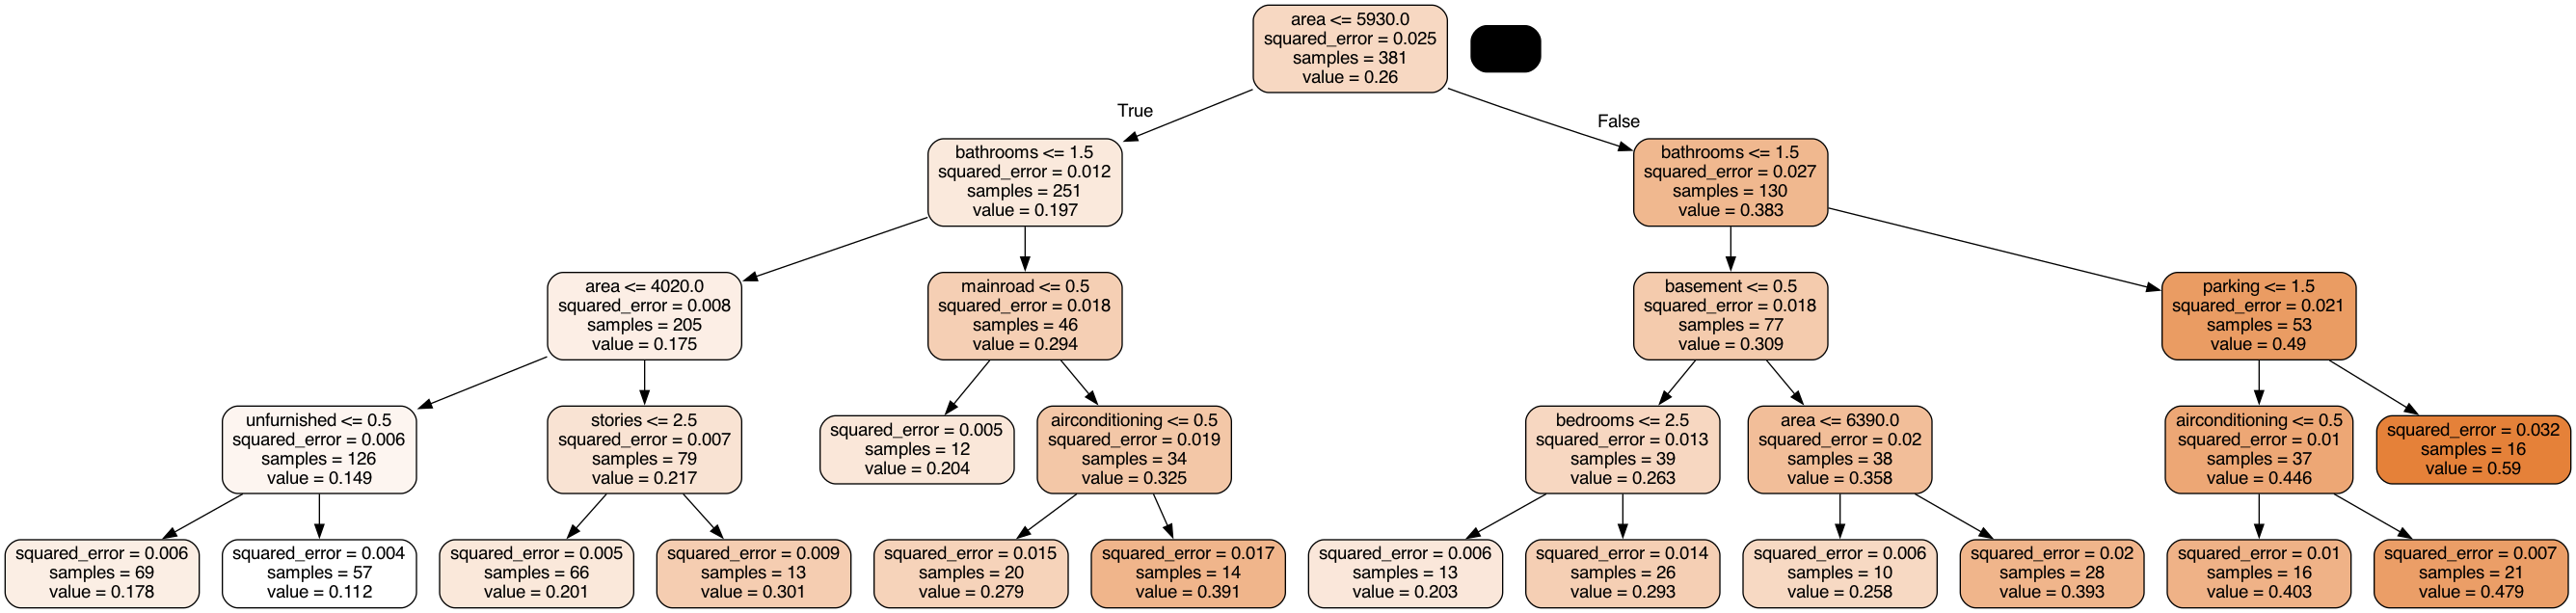

In [86]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [87]:
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [88]:
#Evaluate the model
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.6234560022579934

In [ ]:
r2_score(y_test, y)